In [191]:
#Librerias utilizadas
import pygad
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [192]:
#Matriz del problema:
matriz = [
    [5,2,4,8,9,0,3,3,8,7],
    [5,5,3,4,4,6,4,1,9,1],
    [4,1,2,1,3,8,7,8,9,1],
    [1,7,1,6,9,3,1,9,6,9],
    [4,7,4,9,9,8,6,5,4,2],
    [7,5,8,2,5,2,3,9,8,2],
    [1,4,0,6,8,4,0,1,2,1],
    [1,5,2,1,2,8,3,3,6,2],
    [4,5,9,6,3,9,7,6,5,10],
    [0,6,2,8,7,1,2,1,5,3]
]

In [193]:
#Funcion de transformacion de binario a decimal
def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))

In [194]:
#Funcion de fitness
def fitness_func(solution, solution_idx):
    fitness = 0
    num = binatodeci(solution)
    xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
    yfs = ((num%16)/16)*10
    for i in range(0,10):
        for j in range(0,10):

            fitness+= math.sqrt((i-xfs)**2  + (j-yfs)**2)*matriz[i][j]
        
    return 100/np.sqrt(fitness)

In [195]:
#Parametros del modelo:
num_generations = 20    # Number of generations.
num_parents_mating = 2  # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 4        # Number of solutions in the population.
num_genes = 8           # Numero de bits del binario
last_fitness = 0
mutation_probability=0.50   # Probabilidad de mutacion

In [196]:
#Print en cada generacion
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed),end=" ")
    print("Fitness = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]),end=" ")
    print("Change = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness),end=" ")
    print("x Best Solution: " +str(binatodeci(ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[0])),end=" ")
    print("Population:",end=" ")
    for x in ga_instance.population:
        print(x,end=" ")
        print(binatodeci(x),end=" ")
    print("")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [197]:
#Definicion del modelo:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       mutation_by_replacement=True,
                       init_range_low=0,
                       init_range_high=2,
                       gene_type=int,
                       mutation_probability=mutation_probability          
)

Generation = 1 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 1 0 1 0 0 0] 40 [0 0 1 0 0 0 0 0] 32 [0 0 0 0 0 0 0 0] 0 
Generation = 2 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 0 0 1 0 0 0] 8 [0 0 0 0 1 0 0 0] 8 [0 0 1 0 0 0 0 0] 32 
Generation = 3 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 0 0 1 0 0 0] 8 [0 0 0 0 0 0 0 0] 0 [0 0 1 0 1 0 0 0] 40 
Generation = 4 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 1 0 1 0 0 0] 40 [0 0 0 0 1 0 0 0] 8 [0 0 1 0 0 0 0 0] 32 
Generation = 5 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 0 0 0 0 0 0] 0 [0 0 0 0 0 0 0 0] 0 [0 0 1 0 0 0 0 0] 32 
Generation = 6 Fitness = 2.233527728526423 Change = 0.0 x Best Solution: 40 Population: [0 0 1 0 1 0 0 0] 40 [0 0 1 0 0 0 0 0] 32 [0 0 0 0 0 0 

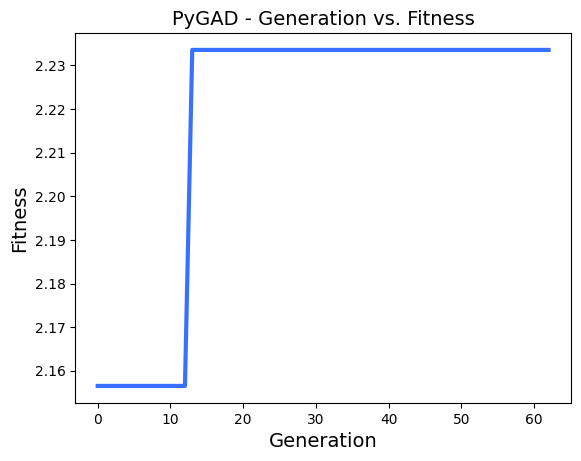

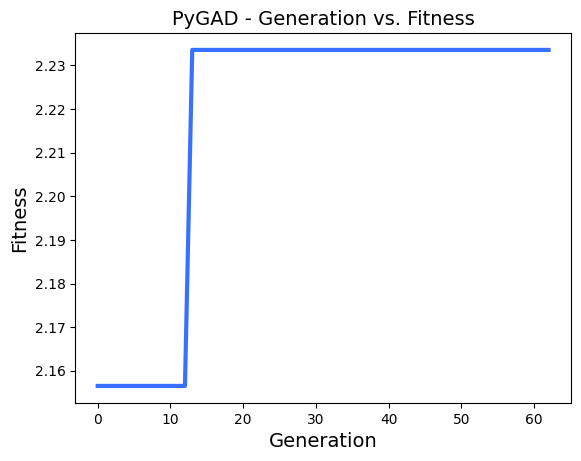

In [203]:
#Resultados de corrida: 
ga_instance.run()
ga_instance.plot_fitness()

In [204]:
# Detalles de la mejor solucion encontrada: 
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("x Best Solution: " +str(binatodeci(solution)))
num = binatodeci(solution)
xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
yfs = ((num%16)/16)*10
print("x Best Solution: " +str(xfs)+" y Best Solution: "+str(yfs))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Parameters of the best solution : [0 0 1 0 1 0 0 0]
x Best Solution: 40
x Best Solution: 1.5625 y Best Solution: 5.0
Fitness value of the best solution = 2.233527728526423
Best fitness value reached after 13 generations.


In [200]:
#Funcion de fitness para generar grafico
def fitness2(num):
    fitness=0
    xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
    yfs = ((num%16)/16)*10
    for i in range(0,10):
        for j in range(0,10):
            fitness+= math.sqrt((i-xfs)**2  + (j-yfs)**2)*matriz[i][j]
        
    return 100/np.sqrt(fitness)

Maximo local = 8 x= 0.3125 y= 5.0
Maximo local = 24 x= 0.9375 y= 5.0
Maximo local = 40 x= 1.5625 y= 5.0
Maximo local = 56 x= 2.1875 y= 5.0
Maximo local = 72 x= 2.8125 y= 5.0
Maximo local = 88 x= 3.4375 y= 5.0
Maximo local = 104 x= 4.0625 y= 5.0
Maximo local = 119 x= 4.6484375 y= 4.375
Maximo local = 135 x= 5.2734375 y= 4.375
Maximo local = 151 x= 5.8984375 y= 4.375
Maximo local = 167 x= 6.5234375 y= 4.375
Maximo local = 183 x= 7.1484375 y= 4.375
Maximo local = 199 x= 7.7734375 y= 4.375
Maximo local = 215 x= 8.3984375 y= 4.375
Maximo local = 231 x= 9.0234375 y= 4.375
Maximo local = 247 x= 9.6484375 y= 4.375
Maximo Global: 104
Fitness: 2.436224680150709
x: 4.0625 y:5.0


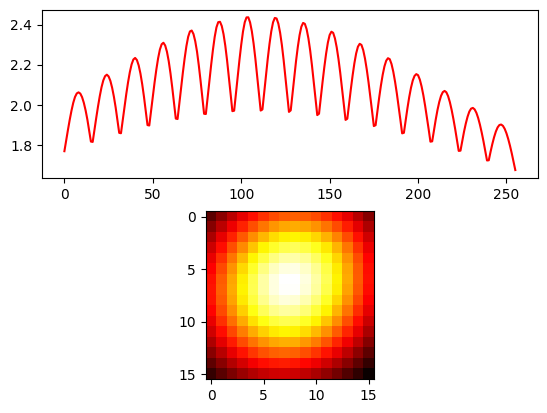

In [201]:
#Maximos locales y globales, grafico y mapa de calor del problema para analizar resultados
valoresx = range(0,256)
y = [fitness2(x) for x in valoresx]
maxL = argrelextrema(np.array(y), np.greater)
for num in maxL[0]:
    xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
    yfs = ((num%16)/16)*10
    print("Maximo local = "+str(num),end= " ")
    print("x= "+str(xfs),end= " ")
    print("y= "+str(yfs))
num = y.index(max(y))
xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
yfs = ((num%16)/16)*10
print("Maximo Global: "+str(y.index(max(y))))
print("Fitness: "+str(max(y)))
print("x: "+str(xfs)+" y:"+ str(yfs))
fig, ax = plt.subplots(2)
ax[0].plot(valoresx, y, color="red")
a = np.reshape(y,(16,16))
ax[1].imshow(a,cmap='hot', interpolation='nearest')
plt.show()